In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

from sklearn import datasets, metrics, model_selection


In [11]:
xlsx = pd.ExcelFile('Feat_extracts well1.xlsx')
df = pd.read_excel(xlsx, 'PCAs')
dataset_pca= df.copy()
dataset_pca

,index,PC1,PC2,PC3
0,0,-3.398520,2.499091,0.178797
1,1,-3.403833,2.489971,0.105971
2,2,-3.451285,2.485884,0.033656
3,3,-3.515515,2.479439,-0.027975
4,4,-3.560541,2.492715,-0.047035
...,...,...,...,...
13852,13852,0.962859,-2.179569,-2.287310
13853,13853,0.938350,-2.179777,-2.362097
13854,13854,0.894981,-2.185274,-2.387264
13855,13855,0.858602,-2.230196,-2.407852


In [12]:


dataset_pca.pop('index')

# dataset_pca1= dataset_pca('PC1','PC1','PC3')
dataset_pca

,PC1,PC2,PC3
0,-3.398520,2.499091,0.178797
1,-3.403833,2.489971,0.105971
2,-3.451285,2.485884,0.033656
3,-3.515515,2.479439,-0.027975
4,-3.560541,2.492715,-0.047035
...,...,...,...
13852,0.962859,-2.179569,-2.287310
13853,0.938350,-2.179777,-2.362097
13854,0.894981,-2.185274,-2.387264
13855,0.858602,-2.230196,-2.407852


In [13]:
# import treated data

xlsx_3 = pd.ExcelFile('Feat_extracts well1.xlsx')
df_3 = pd.read_excel(xlsx_3, 'target')
pca_target= df_3.copy()

pca_target

,RHOB
0,2.24710
1,2.25870
2,2.25890
3,2.25460
4,2.25150
...,...
13852,2.52625
13853,2.52590
13854,2.52555
13855,2.52520


In [14]:
train_input, test_input, train_target, test_target = model_selection.train_test_split(dataset_pca, pca_target['RHOB'], train_size=0.7)

print('train samples:', len(train_input))
print('test samples', len(test_input))


train samples: 9699
test samples 4158


In [3]:
# non pcas

xlsx = pd.ExcelFile('./Data/Outlier_thresh1_50.xlsx')
df = pd.read_excel(xlsx, '1S 4X')
dataset1= df.copy()




from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
Sd_scaler1 =scaler1.fit(dataset1)
data1_Sd= Sd_scaler1.transform(dataset1)
print(data1_Sd)
    
    #convert to dataframe
dataset= pd.DataFrame(data1_Sd, columns=dataset1.keys())



# split datat into input and target

inputs = dataset.copy()

target = inputs.pop('RHOB')


train_input, test_input, train_target, test_target = model_selection.train_test_split(inputs, target, train_size=0.7)

print('train samples:', len(train_input))
print('test samples', len(test_input))


[[-1.73163915  2.51697914  0.14781493 ... -2.87725798 -0.02998333
  -3.06763472]
 [-1.73081574  2.52923055  0.4129627  ... -2.93944911 -0.31479146
  -3.7477384 ]
 [-1.72999232  2.54148197  0.80347369 ... -3.00164023 -0.25737338
  -4.21784884]
 ...
 [ 1.72999232 -0.57576699 -0.63341287 ...  0.06032096 -0.12310411
   1.7543647 ]
 [ 1.73081574 -0.57596783 -0.60694777 ...  0.14599241 -0.13214277
   1.74230317]
 [ 1.73163915 -0.57616867 -0.90593453 ...  0.15804987 -0.15340622
   1.7008101 ]]
train samples: 2944
test samples 1263


In [4]:
print(dataset)

         DEPTH      CALI        GR       ILD       ITT       LLD       LLS  \
0    -1.731639  2.516979  0.147815  0.637840 -0.317773 -0.311624 -0.309417   
1    -1.730816  2.529231  0.412963 -0.218280 -0.412743 -0.314144 -0.323037   
2    -1.729992  2.541482  0.803474 -0.114471 -0.507713 -0.313667 -0.336657   
3    -1.729169  2.553733  1.058458  0.136484 -0.602683 -0.307471 -0.350277   
4    -1.728345  2.565985  1.026933  0.278547 -0.593186 -0.306495 -0.363896   
...        ...       ...       ...       ...       ...       ...       ...   
4202  1.728345 -0.575181 -0.686343 -0.077954 -1.386187 -0.057868  0.009181   
4203  1.729169 -0.575474 -0.659878 -0.065343 -1.362445 -0.125620 -0.082412   
4204  1.729992 -0.575767 -0.633413 -0.044466 -1.343451 -0.147659 -0.157118   
4205  1.730816 -0.575968 -0.606948 -0.023588 -1.329205 -0.169698 -0.164358   
4206  1.731639 -0.576169 -0.905935 -0.002710 -1.357696 -0.140328 -0.143169   

          MSFL      NPHI      RHOB       SFL        SP  
0    -

# Tuning batch and epoch

In [7]:
from sklearn.model_selection import GridSearchCV 
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')
from keras.wrappers.scikit_learn import KerasRegressor

# Function to create model,for KerasClassifier
def create_my_model():
    #defining my model
    mymodel = Sequential()
    mymodel.add(Dense(32, input_dim=3, activation='relu'))
    mymodel.add(Dense(1))
    
    # Compile the model
    mymodel.compile(loss='mae', optimizer='adam', metrics=['mse'])
    return mymodel

# create model
model_BE = KerasRegressor(build_fn=create_my_model)

In [8]:
# define the grid search parameters
batchSize = [10, 20, 40, 50, 60, 80, 100]
epochs = [5,10,15, 30, 50,70,100,150]

parameter_grid = dict(batch_size=batchSize, epochs=epochs)

from sklearn.model_selection import GridSearchCV 
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')
from keras.wrappers.scikit_learn import KerasRegressor
mygrid = GridSearchCV(estimator=model_BE, param_grid=parameter_grid, n_jobs=-1, cv=3)
grid_result = mygrid.fit(train_input, train_target)

Epoch 1/150
485/485 [==============================] - 0s 496us/step - loss: 0.6773 - mse: 1.0402
Epoch 2/150
485/485 [==============================] - 0s 452us/step - loss: 0.0713 - mse: 0.0103
Epoch 3/150
485/485 [==============================] - 0s 457us/step - loss: 0.0502 - mse: 0.0048
Epoch 4/150
485/485 [==============================] - 0s 460us/step - loss: 0.0465 - mse: 0.0041
Epoch 5/150
485/485 [==============================] - 0s 421us/step - loss: 0.0445 - mse: 0.0039
Epoch 6/150
485/485 [==============================] - 0s 477us/step - loss: 0.0433 - mse: 0.0037
Epoch 7/150
485/485 [==============================] - 0s 462us/step - loss: 0.0423 - mse: 0.0035
Epoch 8/150
485/485 [==============================] - 0s 439us/step - loss: 0.0415 - mse: 0.0034
Epoch 9/150
485/485 [==============================] - 0s 422us/step - loss: 0.0402 - mse: 0.0032
Epoch 10/150
485/485 [==============================] - 0s 427us/step - loss: 0.0402 - mse: 0.0032
Epoch 11/150
485/48

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Optimizing Activation Function

In [39]:
from sklearn.model_selection import GridSearchCV 
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')
from keras.wrappers.scikit_learn import KerasRegressor


# Function to create model
def create_my_model(optimizer='adam'):
    # create model
    mymodel = Sequential()
    mymodel.add(Dense(32, input_dim=3, activation='relu'))
    mymodel.add(Dense(1))
    # Compile model
    mymodel.compile(loss='mae', optimizer=optimizer, metrics=['mse'])
    return mymodel

# create model
model_OPT = KerasRegressor(build_fn=create_my_model,
                           epochs=50,
                           batch_size=40
                          )

In [40]:
# define the grid search parameters
optimizer = ['SGD','Adadelta', 'RMSprop', 'Adagrad','Adam','Adamax']
parameter_grid = dict(optimizer=optimizer)

grid = GridSearchCV(estimator=model_OPT, param_grid=parameter_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(train_input, train_target)

Epoch 1/50
243/243 [==============================] - 0s 562us/step - loss: 1.1272 - mse: 2.0817
Epoch 2/50
243/243 [==============================] - 0s 534us/step - loss: 0.3698 - mse: 0.3483
Epoch 3/50
243/243 [==============================] - 0s 575us/step - loss: 0.1149 - mse: 0.0314
Epoch 4/50
243/243 [==============================] - 0s 542us/step - loss: 0.0547 - mse: 0.0058
Epoch 5/50
243/243 [==============================] - 0s 550us/step - loss: 0.0479 - mse: 0.0044
Epoch 6/50
243/243 [==============================] - 0s 562us/step - loss: 0.0448 - mse: 0.0038
Epoch 7/50
243/243 [==============================] - 0s 570us/step - loss: 0.0431 - mse: 0.0035
Epoch 8/50
243/243 [==============================] - 0s 570us/step - loss: 0.0412 - mse: 0.0033
Epoch 9/50
243/243 [==============================] - 0s 538us/step - loss: 0.0404 - mse: 0.0031
Epoch 10/50
243/243 [==============================] - 0s 550us/step - loss: 0.0394 - mse: 0.0030
Epoch 11/50
243/243 [========

In [41]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -0.036512 using {'optimizer': 'Adam'}


In [26]:
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = keras.Sequential()

    for i in range(hp.Int('num_layers', 1, 10)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=2,
                                            max_value=64,
                                            step=4,            
#                                             sampling="log"
                                           ),
                                            activation= 'relu'
                              ))
#         for i in [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1] 
        model.add(layers.Dropout(rate=hp.Float('D_rate_'+ str(i),
                                              min_value=0.0,
                                              max_value=1.0,
                                              step=0.1
                                              #sampling="log"
                                              ),       
                                ))

    model.add(layers.Dense(1,
#                            activation='linear'
                          ))
    model.compile(
        optimizer=keras.optimizers.Adam(
        hp.Choice('learning_rate', [0.15, 0.1, 1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mse'])
    return model


tuner = RandomSearch(
    build_model,
    objective=  'val_loss',   #   'val_mean_absolute_error', #(['loss', 'mse', 'val_loss', 'val_mse']
    max_trials=10,
    executions_per_trial=7,
    directory='Test_weights2',
    project_name='ANNTuning2')


tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 64, 'step': 4, 'sampling': None}
D_rate_0 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 1.0, 'step': 0.1, 'sampling': None}
learning_rate (Choice)
{'default': 0.15, 'conditions': [], 'values': [0.15, 0.1, 0.01, 0.001, 0.0001], 'ordered': True}


In [5]:
from tensorflow.keras.layers.experimental import preprocessing
    
tuner.search(train_input, train_target,
             epochs=35,
             validation_data=(test_input, test_target),            
            
            )

NameError: name 'tuner' is not defined

In [28]:
tuner.results_summary()

Results summary
Results in Test_weights2\ANNTuning2
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
num_layers: 4
units_0: 58
D_rate_0: 0.5
learning_rate: 0.001
units_1: 38
D_rate_1: 0.4
units_2: 22
D_rate_2: 0.4
units_3: 54
D_rate_3: 0.2
units_4: 6
D_rate_4: 0.9
units_5: 34
D_rate_5: 0.1
units_6: 22
D_rate_6: 0.9
Score: 0.04048472908990724
Trial summary
Hyperparameters:
num_layers: 6
units_0: 6
D_rate_0: 0.4
learning_rate: 0.001
units_1: 30
D_rate_1: 0.5
units_2: 10
D_rate_2: 0.30000000000000004
units_3: 42
D_rate_3: 0.30000000000000004
units_4: 58
D_rate_4: 0.5
units_5: 30
D_rate_5: 0.5
units_6: 46
D_rate_6: 0.9
Score: 0.05250928071992738
Trial summary
Hyperparameters:
num_layers: 1
units_0: 34
D_rate_0: 0.2
learning_rate: 0.1
units_1: 46
D_rate_1: 0.30000000000000004
units_2: 2
D_rate_2: 0.1
units_3: 46
D_rate_3: 0.7000000000000001
units_4: 62
D_rate_4: 0.30000000000000004
units_5: 26
D_rate_5: 0.1
units_6: 58
D_rate_6: 0.5
Score: 0.

In [16]:
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing

# A function to hold preprocessor, layers, model and compiler 
def FFBackProp(inputs, output):

    
    model1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(58,activation="relu"
                          , input_shape=(3,), 
#                           kernel_regularizer="l2"
                         ),
    tf.keras.layers.Dropout(0.5),
        
    tf.keras.layers.Dense(38,activation="relu", 
#                           kernel_regularizer="l2"
                         ),
    tf.keras.layers.Dropout(0.4),
        
    tf.keras.layers.Dense(22,activation="relu", 
#                           kernel_regularizer="l2"
                         ),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Dense(54,activation="relu", 
#                           kernel_regularizer="l2"
                         ),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(6,activation="relu", 
#                           kernel_regularizer="l2"
                         ),
    tf.keras.layers.Dropout(0.9),
    tf.keras.layers.Dense(34,activation="relu", 
#                           kernel_regularizer="l2"
                         ),
    tf.keras.layers.Dropout(0.1),
            tf.keras.layers.Dense(22,activation="relu", 
#                           kernel_regularizer="l2"
                         ),
    tf.keras.layers.Dropout(0.9),

    
        #output layer
    tf.keras.layers.Dense(1),
  ]
    )
    
    
#     compile the model
    model1.compile(optimizer='adam',
                loss='mean_absolute_error', #(from_logits=True),
                metrics=["mse"],
#                 learning_rate=0.001
               )
    
    model1.summary()
    
    return model1
    
myFFBP= FFBackProp(train_input,train_target)


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 58)                232       
_________________________________________________________________
dropout_14 (Dropout)         (None, 58)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 38)                2242      
_________________________________________________________________
dropout_15 (Dropout)         (None, 38)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 22)                858       
_________________________________________________________________
dropout_16 (Dropout)         (None, 22)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 54)               

# train

In [17]:
%%time
tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

myFFBPtraining = myFFBP.fit(
    train_input, train_target,
    # Calculate validation results on 30% of the training data
    validation_split=0.3,
     # suppress logging
    verbose=0,
#     epochs=100,
    

    #early stopping
    #an attempt to prevent overfitting
    #the fuction to stop the trianing by tracking the validation loss
    callbacks= keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
    
    #to store callbacks in logs
#     callbacks =[tb_callback]
)

Wall time: 1.36 s


In [18]:
# collect the results in a set
test_results={}
# test_results['FFBP']

test_mse, test_mae= myFFBP.evaluate(test_input, test_target, verbose=0, )
print('Test loss (mse):', test_mse)
print('Test mae:', test_mae)

Test loss (mse): 1.1927307844161987
Test mae: 1.4349908828735352


In [20]:


predicted = myFFBP.predict(test_input) #.flatten() ##Flattening converts multidimensional lists into one-dimensional lists


In [22]:
# using sklearn
print("r2 score: {}".format(metrics.r2_score(test_target,predicted)))
print("mse: {}".format(metrics.mean_squared_error(test_target, predicted)))
print("rmse: {}".format(np.sqrt(metrics.mean_squared_error(test_target, predicted))))
print("mae: {}".format(metrics.mean_absolute_error(test_target, predicted)))

r2 score: -114.88256899352649
mse: 1.4349908106141642
rmse: 1.1979110194894127
mae: 1.1927310191023521


# Testing model on different wells

r2 score: -33.72337042959991
mse: 0.8622181184556674
rmse: 0.9285570087268027
mae: 0.543222936576818


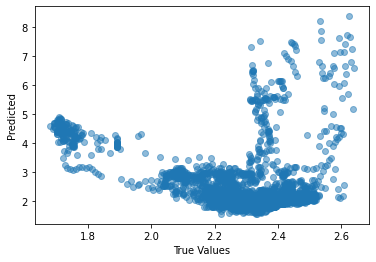

In [16]:
# Feat_extracts well3
def predictme(well_name):
    xlsx_2 = pd.ExcelFile(well_name)
    df_2 = pd.read_excel(xlsx_2, 'PCAs')
    dataset_pca_2= df_2.copy()


    # dataset_pca.pop('PC3')
    dataset_pca_2.pop('index')

    dataset_pca_2


    xlsx_2y = pd.ExcelFile(well_name)
    df_2y = pd.read_excel(xlsx_2y, 'target')
    pca_target_2y= df_2y.copy()

    # pca_target_2y.pop('RHOB')
    pca_target_2y



    predicted_2y = myFFBP.predict(dataset_pca_2)

    fig, ax = plt.subplots()
    ax.scatter(pca_target_2y, predicted_2y, alpha=0.5)

    ax.set_xlabel('True Values')
    ax.set_ylabel('Predicted')


    print("r2 score: {}".format(metrics.r2_score(pca_target_2y, predicted_2y)))
    print("mse: {}".format(metrics.mean_squared_error(pca_target_2y, predicted_2y)))
    print("rmse: {}".format(np.sqrt(metrics.mean_squared_error(pca_target_2y, predicted_2y))))
    print("mae: {}".format(metrics.mean_absolute_error(pca_target_2y, predicted_2y)))
    
    return 

predictme("Feat_extracts well4.xlsx")